In [1]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

Загружаем датасет Olivetti faces

In [2]:
faces = fetch_olivetti_faces()

Выводим инфу о количественных параметрах датасета

In [5]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [6]:
faces["data"].shape

(400, 4096)

In [7]:
faces["images"].shape

(400, 64, 64)

Выводим изображения

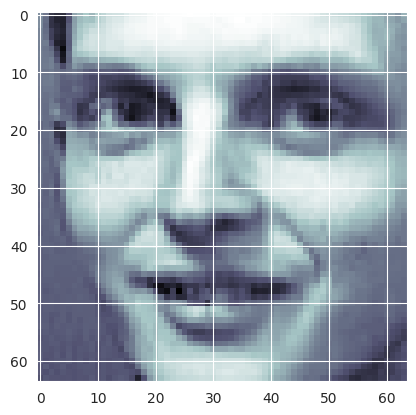

In [8]:
for img in faces["images"]:
    plt.imshow(img, cmap=plt.cm.bone)

Выводим все изображения, связанные с конкретным человеком<br>
1 - количество строк<br>
n - количество столбцов<br>

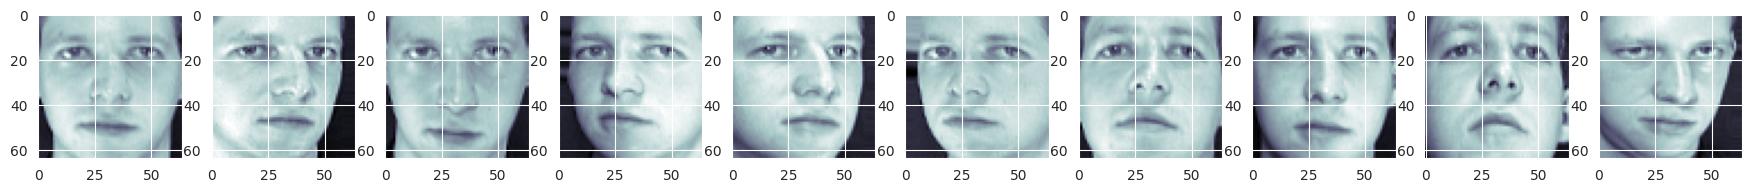

In [26]:
items_count = 10
fig, axs = plt.subplots(1, items_count, figsize=(22, 22))
for i in range(items_count):
    axs[i].imshow(faces.images[i], cmap=plt.cm.bone)

Делим данные на тестовую и обучающую выборки

In [10]:
#матрица пикселей
X = faces.data

#Отношение данных к конкретному классу
Y = faces.target
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [11]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [12]:
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Строим модель классификатора метода опорных векторов для идентификации человека по изображению

In [13]:
clf = svm.SVC()
clf.fit(X, Y)

SVC()

In [14]:
y_pred = clf.predict(x_test)

In [15]:
metrics.confusion_matrix(y_test, y_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 212.7222222222222, 'Предсказанные значения')

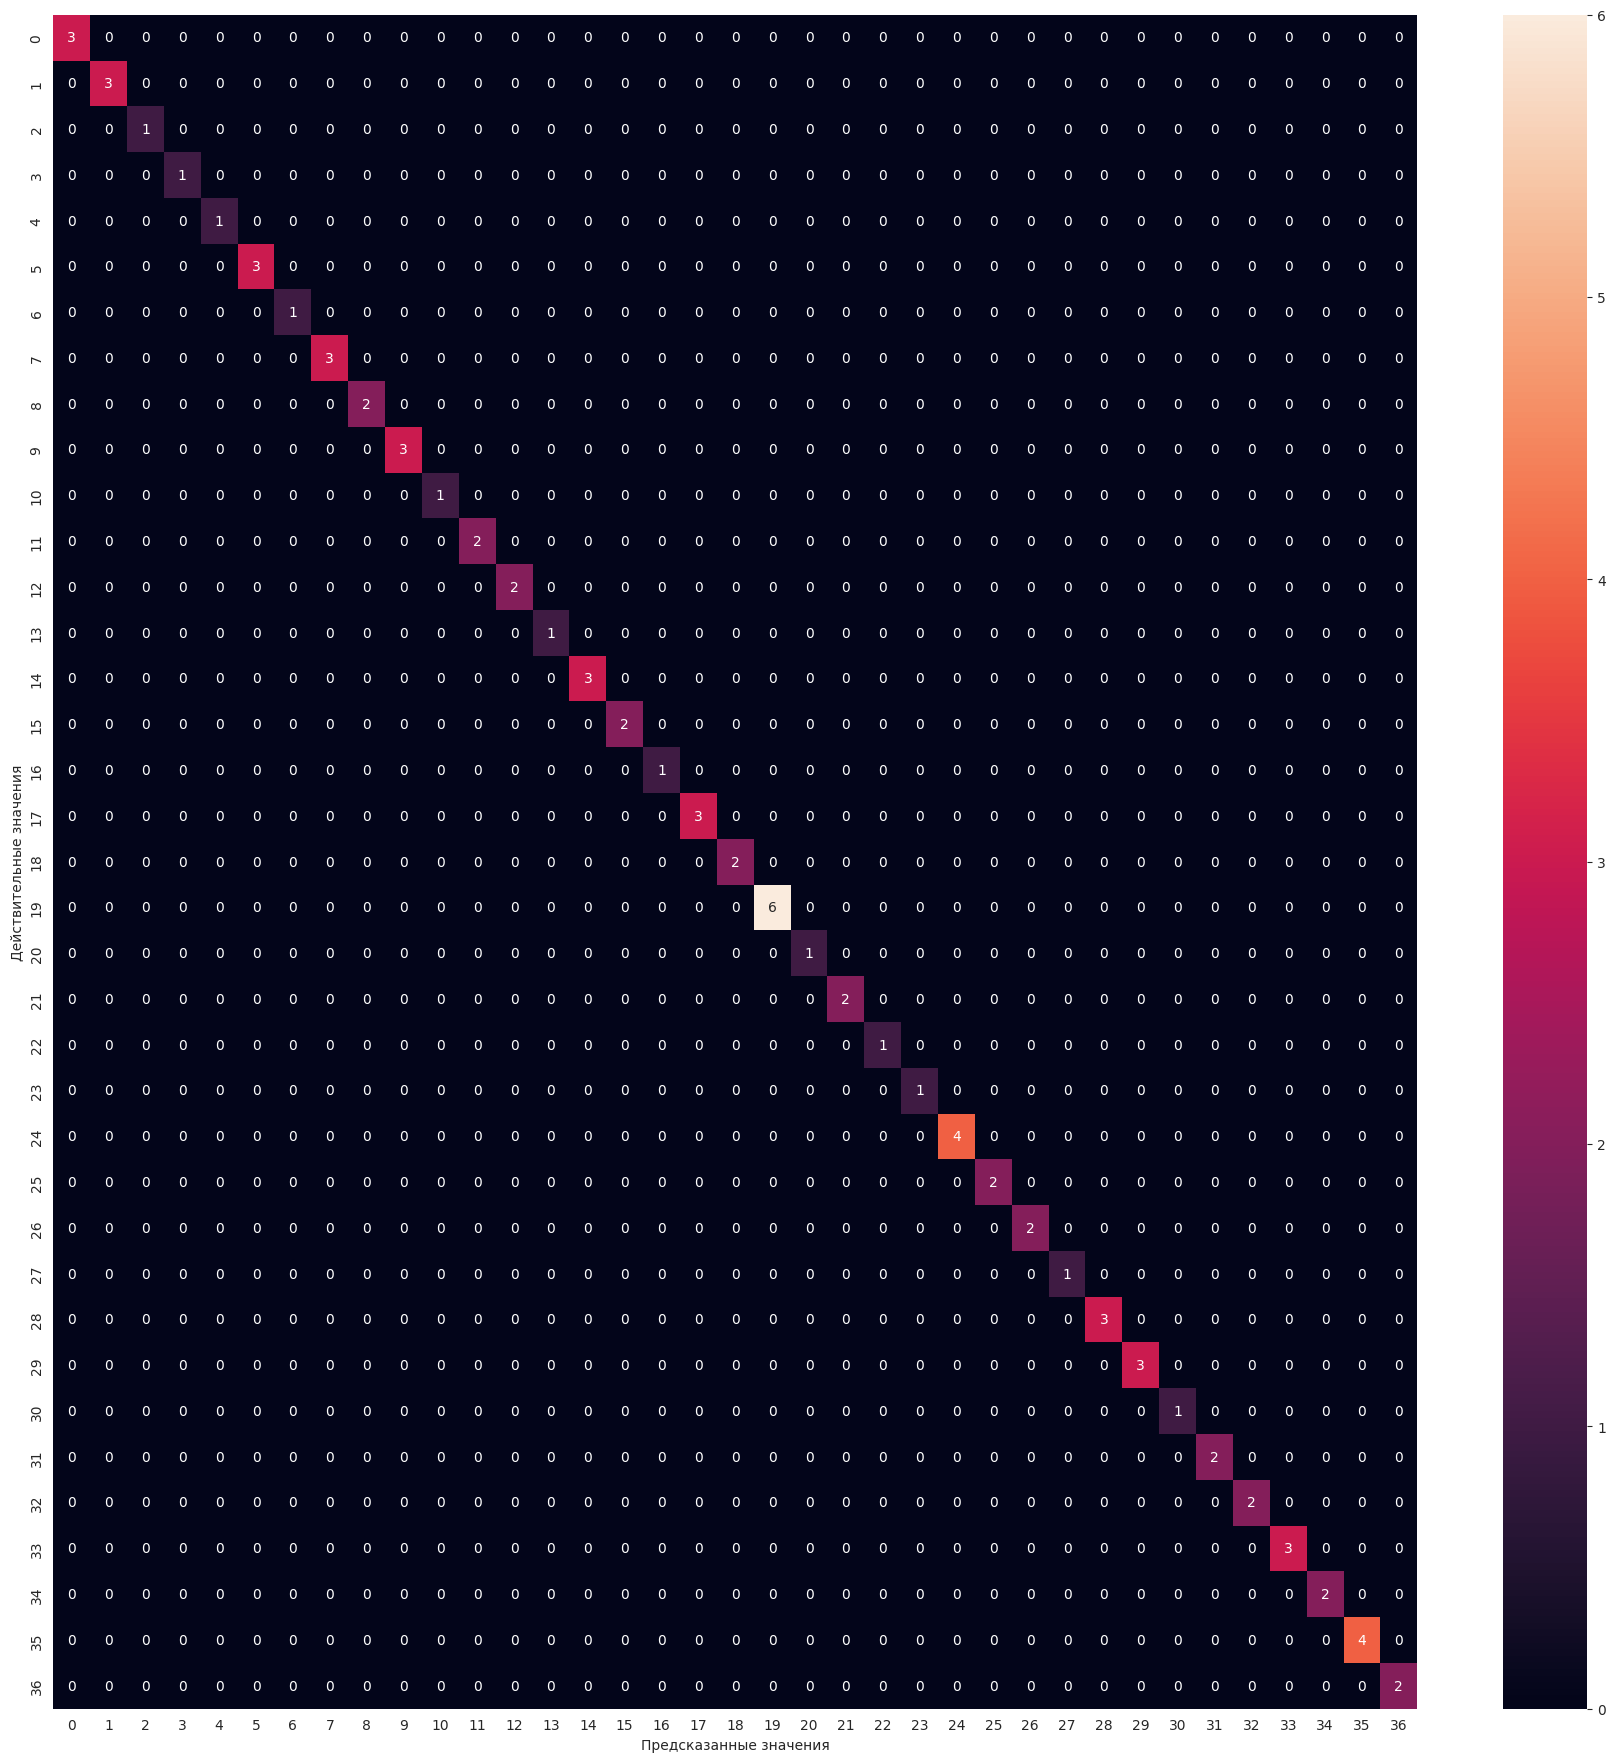

In [28]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots(figsize=(22, 22))

ticks = np.arange(len(class_names))

plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

#Строим матрицу при помощи sns
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оцениваем качество модели на тестовой выборке с помощью следующих метрик
- достоверность предсказания (accuracy)
- точность (precision)
- полнота (recall)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1
          20       1.00    

Строим график зависимости тестовой и обучающей эффективности от размера обучающей выборки

In [16]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    
    axes[0].set_xlabel("Тренировочные примеры")
    axes[0].set_ylabel("Оценка")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Тренировочная оценка")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Оценка кросс-валидации")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Тренировочные данные")
    axes[1].set_ylabel("Успешность")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("Успешность")
    axes[2].set_ylabel("Оценка")
    axes[2].set_title("Эффективность модели")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

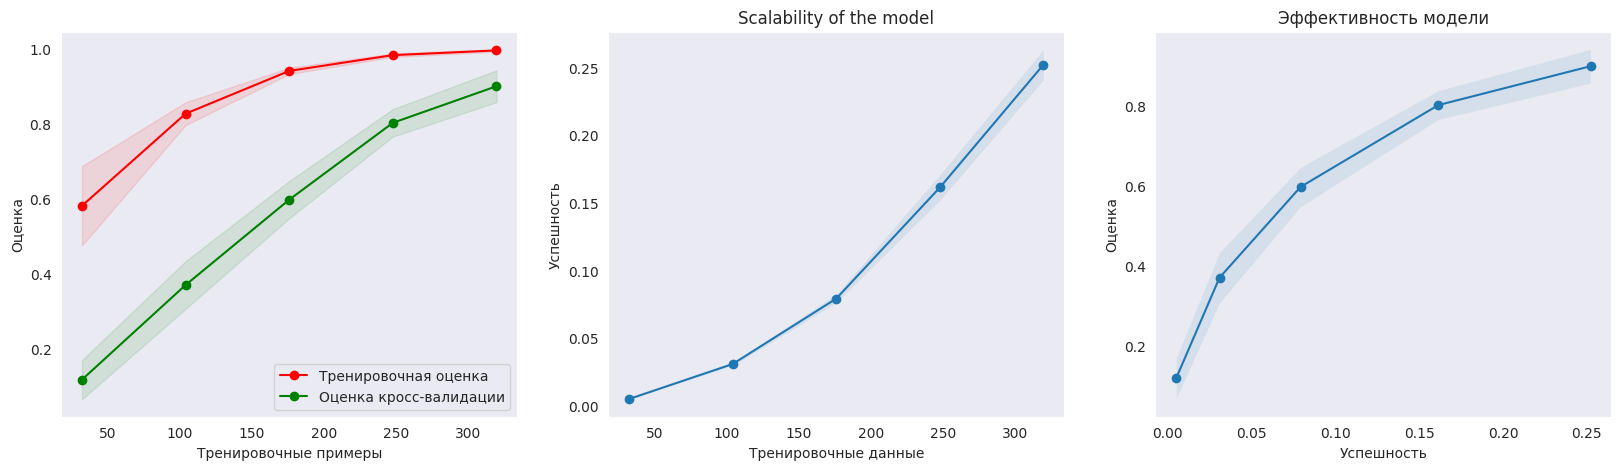

In [17]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(clf, "", X, Y, cv=cv)